In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import random
import shutil

In [2]:
# We decided to exclude the 'other' category.

influencer_category = ['beauty', 'family', 'fashion', 'fitness', 'food', 'interior', 'pet', 'travel']

In [3]:
influencers_data = './../data/influencers.csv'

In [4]:
df_influencers = pd.read_csv(influencers_data)

In [5]:
influencers_counts = {}

for category in influencer_category:
    influencers_counts[category] = df_influencers[df_influencers['category'] == category].username.count()

In [6]:
influencers_counts

{'beauty': 1541,
 'family': 4070,
 'fashion': 11911,
 'fitness': 1133,
 'food': 3565,
 'interior': 1195,
 'pet': 587,
 'travel': 4210}

In [7]:
row_index = random.randint(0, influencers_counts["beauty"]-1)
print(row_index)
df_influencers.iloc[row_index]

1427


username         daily.malarina
category                 beauty
num_followers           12071.0
num_followees             429.0
num_posts                 574.0
Name: 1427, dtype: object

In [8]:
NUM_OF_INFLUENCERS_PER_CATEGORY = 10
NUM_OF_FILES_PER_INFLUENCER = 10

In [9]:
# Number of influencers per category and accumulated number.

category_cum_sum = 0

for category in influencers_counts:
    category_cum_sum = category_cum_sum + influencers_counts[category]
    print(f"{category}: {influencers_counts[category]} , acc: {category_cum_sum}")

beauty: 1541 , acc: 1541
family: 4070 , acc: 5611
fashion: 11911 , acc: 17522
fitness: 1133 , acc: 18655
food: 3565 , acc: 22220
interior: 1195 , acc: 23415
pet: 587 , acc: 24002
travel: 4210 , acc: 28212


In [10]:
# Randomly picking N usernames in each category.

category_cum_sum = 0
prev_count = 0

username_dict = {'beauty':[], 'family':[], 'fashion':[], 'fitness':[], 
                 'food':[], 'interior':[], 'pet':[], 'travel':[]}

for category in influencers_counts:
    category_cum_sum = category_cum_sum + influencers_counts[category]
    for i in range(0, NUM_OF_INFLUENCERS_PER_CATEGORY):
        row_index = random.randint(prev_count, category_cum_sum-1)
        username_dict[category].append(df_influencers.iloc[row_index].username)
    prev_count = category_cum_sum
    
print(username_dict)

{'beauty': ['whittensavannah', 'caterina_tonzuso', 'ameerabelle', '_sainte', 'meninadibatom', 'lovleesazy', 'beautifulyouliverpool', 'tanejasbride', 'ooh.mee', 'yvettepokes'], 'family': ['alysemb', 'gokican', 'faye_erin_jones', '_theoliveoil', 'simplysadiejane', 'bonprime', 'bonprime', 'raisingrosiejane', 'abbyevans', 'samuelpavitt'], 'fashion': ['loveleighlove', 'gregorhuntercoleman', 'urvimehta_', 'marthagraeff', 'ende_denim', 'notsobasik', 'healthyalibi', 'tendancehunter', 'thats_sew_kari', 'classyandkate'], 'fitness': ['skinnymeg31', 'ashleighmareeross', 'elliotfitness', 'fitbyclem', 'kattercup', 'papahawkk', 'crimsnmacchiato', 'skozerawski', 'mommy.yoga', 'anafitfoodie'], 'food': ['floridafoodandfarm', 'naturaleemporiolight', 'apriljharris', 'unefilleenprovence', 'jehancancook', 'flouronmyface2', 'mobkitchenuk', 'homemadeandyummy', 'kcplates', 'sequestoeunuovo'], 'interior': ['jamies_jungle', 'frumetin', 'interior.mum', 'loft47interiorismo', 'csirinyi', 'gettingstuffdoneinheels', 

In [11]:
image_folders = '/Users/mshayganfar/Documents/Mahni/Influencers/images/'

In [12]:
filenames_dict = {'beauty':[], 'family':[], 'fashion':[], 'fitness':[], 
                  'food':[], 'interior':[], 'pet':[], 'travel':[]}

In [13]:
# Reading image file names.

for category in username_dict:
    for username in username_dict[category]:
        first_char = username[0]
        if first_char.isalpha() == False:
            first_char = '_'
        # check if file exist in destination
        if os.path.exists(image_folders + first_char):
            specific_folder = image_folders + first_char + '/'
            filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.startswith(username)]
            filenames_dict[category].append(filenames)
        else:
            print(f"Folder {first_char} doesn't exist!")
    print(f"Category {category} is done.")

Category beauty is done.
Category family is done.
Category fashion is done.
Category fitness is done.
Category food is done.
Category interior is done.
Category pet is done.
Category travel is done.


In [ ]:
# filenames_dict

In [14]:
# Number of image files within each category per influencer.

for category in filenames_dict:
    for i in range(0, len(filenames_dict[category])):
        print(f"category: {category}, len: {len(filenames_dict[category][i])}, i: {i}")

category: beauty, len: 362, i: 0
category: beauty, len: 300, i: 1
category: beauty, len: 338, i: 2
category: beauty, len: 366, i: 3
category: beauty, len: 302, i: 4
category: beauty, len: 345, i: 5
category: beauty, len: 397, i: 6
category: beauty, len: 369, i: 7
category: beauty, len: 312, i: 8
category: beauty, len: 411, i: 9
category: family, len: 385, i: 0
category: family, len: 399, i: 1
category: family, len: 336, i: 2
category: family, len: 357, i: 3
category: family, len: 540, i: 4
category: family, len: 470, i: 5
category: family, len: 470, i: 6
category: family, len: 404, i: 7
category: family, len: 319, i: 8
category: family, len: 321, i: 9
category: fashion, len: 313, i: 0
category: fashion, len: 303, i: 1
category: fashion, len: 382, i: 2
category: fashion, len: 421, i: 3
category: fashion, len: 389, i: 4
category: fashion, len: 302, i: 5
category: fashion, len: 325, i: 6
category: fashion, len: 348, i: 7
category: fashion, len: 333, i: 8
category: fashion, len: 356, i: 9


In [15]:
subsampled_filenames_dict = {'beauty':[], 'family':[], 'fashion':[], 'fitness':[], 
                             'food':[], 'interior':[], 'pet':[], 'travel':[]}

In [16]:
# Subsampling M number of image files within each category per influencer.

for category in filenames_dict:
    for i in range(0, len(filenames_dict[category])):
        influencer_image_filenames = []
        for file_count in range(0, NUM_OF_FILES_PER_INFLUENCER): 
            filename_index = random.randint(0, len(filenames_dict[category][i])-1)
            influencer_image_filenames.append(filenames_dict[category][i][filename_index])
        subsampled_filenames_dict[category].append(influencer_image_filenames)

In [ ]:
# subsampled_filenames_dict

In [17]:
src_image_folders_base     = '/Users/mshayganfar/Documents/Mahni/Influencers/images/'
dst_image_folders_base     = '/Users/mshayganfar/Documents/Mahni/Influencers/subset_images/'
resized_image_folders_base = '/Users/mshayganfar/Documents/Mahni/Influencers/resized_images/'

In [18]:
# Copying the subsampled files into the destination folder.

for category in subsampled_filenames_dict:
    for i in range(0, len(subsampled_filenames_dict[category])):
        for j in range(0, len(subsampled_filenames_dict[category][i])):
            filename = subsampled_filenames_dict[category][i][j]
            first_char = filename[0]
            if first_char.isalpha() == False:
                first_char = '_'
            # check if file exist in destination
            if os.path.exists(src_image_folders_base + first_char):
                specific_src_folder = src_image_folders_base + first_char + '/'
                shutil.copy(specific_src_folder + filename, dst_image_folders_base + category + '/' + filename)
            else:
                print(f"Folder {first_char} doesn't exist!")
    print(f"Category {category} is done.")

Category beauty is done.
Category family is done.
Category fashion is done.
Category fitness is done.
Category food is done.
Category interior is done.
Category pet is done.
Category travel is done.


### Image Preparation

In [19]:
def load_image(image_path, image_name):
    image = cv2.imread(os.path.join(image_path, image_name))
    # print(os.path.join(image_path, image_name))
    return image

In [20]:
def resize_image(src_image, width, height):
    # print('Original Image Dimensions: ', src_image.shape)
    
    dim = (width, height)
    
    # resize image
    resized_image = cv2.resize(src_image, dim, interpolation=cv2.INTER_AREA)
    
    # print('Resized Image Dimensions : ', resized_image.shape)
    
    return resized_image

In [21]:
def save_image(image_path, image_name, image):
    cv2.imwrite(os.path.join(image_path , image_name), image)

In [22]:
# Resizing and saving subsampled images into a new folder.

for category in subsampled_filenames_dict:
    filenames = os.listdir(dst_image_folders_base + category + '/' + '.')
    for filename in filenames:
        if filename[-3:] == 'jpg':
            loaded_image  = load_image(dst_image_folders_base + category + '/', filename)
            resized_image = resize_image(loaded_image, 50, 50)
            save_image(resized_image_folders_base + category + '/', 'small_' + filename, resized_image)
    print(f"Category {category} is done.")

Category beauty is done.
Category family is done.
Category fashion is done.
Category fitness is done.
Category food is done.
Category interior is done.
Category pet is done.
Category travel is done.


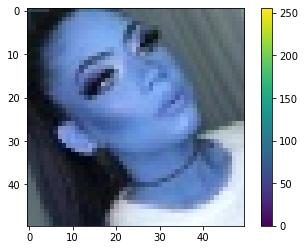

In [23]:
sample_image_path = '/Users/mshayganfar/Documents/Mahni/Influencers/resized_images/beauty/'

loaded_image  = load_image(sample_image_path, 'small_meninadibatom-1869368788220980733.jpg')

plt.figure()
plt.imshow(loaded_image)
plt.colorbar()
plt.grid(False)
plt.show()

### Load Images

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [25]:
batch_size   = 32
image_height = 50
image_width  = 50

In [27]:
train_images = tf.keras.preprocessing.image_dataset_from_directory(
    resized_image_folders_base,
    labels='inferred',
    label_mode='int',
    class_names=['beauty', 'family', 'fashion', 'fitness', 'food', 'interior', 'pet', 'travel'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="training"
)

Found 1064 files belonging to 8 classes.
Using 905 files for training.


In [28]:
validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    resized_image_folders_base,
    labels='inferred',
    label_mode='int',
    class_names=['beauty', 'family', 'fashion', 'fitness', 'food', 'interior', 'pet', 'travel'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="validation"
)

Found 1064 files belonging to 8 classes.
Using 159 files for validation.


### Classification

In [29]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [30]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32,
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                 kernel_size=(3,3), 
                 input_shape=(50, 50, 3), 
                 activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64,
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                 kernel_size=(3,3), 
                 activation='relu'))

# POOLING LAYER & DROPOUT
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, 
                 kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                 kernel_size=(3,3), 
                 activation='relu'))

# POOLING LAYER & DROPOUT
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(128, 
                kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                activation='relu'))
model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
model.add(Dense(64, 
                kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                activation='relu'))
model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 8 POSSIBLE CLASSES
model.add(Dense(8, activation='softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 11, 11, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          3

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [33]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [34]:
history = model.fit(train_images,
                    validation_data=validation_images,
                    epochs=200, 
                    callbacks=[early_stop])

Epoch 1/200
29/29 [==============================] - 3s 68ms/step - loss: 48.5472 - accuracy: 0.1149 - val_loss: 9.9430 - val_accuracy: 0.1384
Epoch 2/200
29/29 [==============================] - 1s 48ms/step - loss: 9.9968 - accuracy: 0.1127 - val_loss: 9.8316 - val_accuracy: 0.1698
Epoch 3/200
29/29 [==============================] - 1s 46ms/step - loss: 9.8163 - accuracy: 0.1271 - val_loss: 9.7505 - val_accuracy: 0.1635
Epoch 4/200
29/29 [==============================] - 1s 46ms/step - loss: 9.7372 - accuracy: 0.1359 - val_loss: 9.6762 - val_accuracy: 0.1384
Epoch 5/200
29/29 [==============================] - 1s 46ms/step - loss: 9.6473 - accuracy: 0.1492 - val_loss: 9.6059 - val_accuracy: 0.1321
Epoch 6/200
29/29 [==============================] - 2s 60ms/step - loss: 9.5828 - accuracy: 0.1425 - val_loss: 9.5402 - val_accuracy: 0.1447
Epoch 7/200
29/29 [==============================] - 1s 48ms/step - loss: 9.5237 - accuracy: 0.1337 - val_loss: 9.4719 - val_accuracy: 0.1384
Epoch

29/29 [==============================] - 1s 43ms/step - loss: 3.4730 - accuracy: 0.2177 - val_loss: 3.4649 - val_accuracy: 0.2390
Epoch 116/200
29/29 [==============================] - 1s 44ms/step - loss: 3.4560 - accuracy: 0.2099 - val_loss: 3.4555 - val_accuracy: 0.2327
Epoch 117/200
29/29 [==============================] - 1s 42ms/step - loss: 3.4259 - accuracy: 0.1856 - val_loss: 3.4225 - val_accuracy: 0.2390
Epoch 118/200
29/29 [==============================] - 1s 42ms/step - loss: 3.3851 - accuracy: 0.1878 - val_loss: 3.3713 - val_accuracy: 0.2138
Epoch 119/200
29/29 [==============================] - 1s 42ms/step - loss: 3.3443 - accuracy: 0.2055 - val_loss: 3.3639 - val_accuracy: 0.2013
Epoch 120/200
29/29 [==============================] - 1s 43ms/step - loss: 3.3466 - accuracy: 0.2199 - val_loss: 3.3560 - val_accuracy: 0.1950
Epoch 121/200
29/29 [==============================] - 1s 44ms/step - loss: 3.3373 - accuracy: 0.1912 - val_loss: 3.3436 - val_accuracy: 0.1887
Epoch 

Epoch 172/200
29/29 [==============================] - 1s 44ms/step - loss: 2.4209 - accuracy: 0.2354 - val_loss: 2.4360 - val_accuracy: 0.2327
Epoch 173/200
29/29 [==============================] - 1s 43ms/step - loss: 2.4266 - accuracy: 0.2453 - val_loss: 2.4023 - val_accuracy: 0.2767
Epoch 174/200
29/29 [==============================] - 1s 44ms/step - loss: 2.3856 - accuracy: 0.2586 - val_loss: 2.3910 - val_accuracy: 0.2579
Epoch 175/200
29/29 [==============================] - 1s 44ms/step - loss: 2.3850 - accuracy: 0.2453 - val_loss: 2.3907 - val_accuracy: 0.2516
Epoch 176/200
29/29 [==============================] - 1s 43ms/step - loss: 2.3568 - accuracy: 0.2685 - val_loss: 2.3783 - val_accuracy: 0.2516
Epoch 177/200
29/29 [==============================] - 1s 43ms/step - loss: 2.3692 - accuracy: 0.2575 - val_loss: 2.3454 - val_accuracy: 0.2767
Epoch 178/200
29/29 [==============================] - 1s 43ms/step - loss: 2.3860 - accuracy: 0.2276 - val_loss: 2.3962 - val_accuracy:

### Evaluate the model

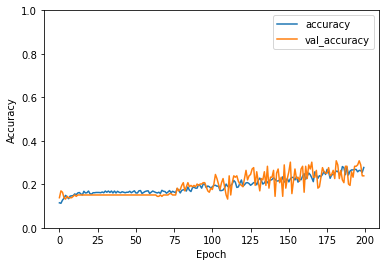

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='upper right')

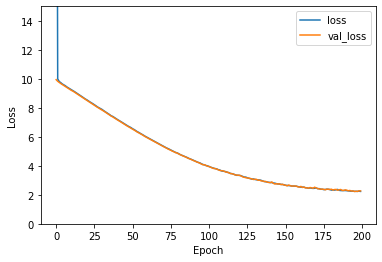

In [36]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 15.0])
plt.legend(loc='upper right')

In [37]:
test_loss, test_acc = model.evaluate(validation_images, verbose=2)

5/5 - 0s - loss: 2.2696 - accuracy: 0.2390 - 55ms/epoch - 11ms/step


In [38]:
metrics = pd.DataFrame(history.history)

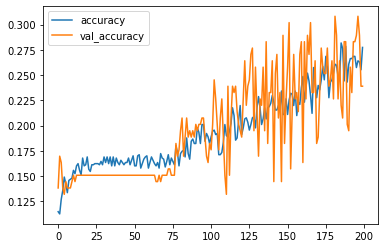

In [39]:
metrics[['accuracy','val_accuracy']].plot()

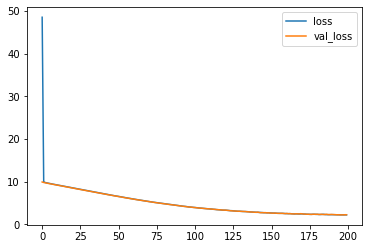

In [40]:
metrics[['loss','val_loss']].plot()

### Testing the Model

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
resized_test_image_folders_base = '/Users/mshayganfar/Documents/Mahni/Influencers/resized_test_images/'

In [50]:
# Randomly pick and load one image from each category.

random_filenames_dict = {}

for category in influencer_category:
    filenames = os.listdir(resized_test_image_folders_base + category + '/' + '.')
    random_file_index = random.randint(0, len(filenames)-1)
    random_filename = filenames[random_file_index]
    random_filenames_dict[category] = random_filename

In [44]:
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

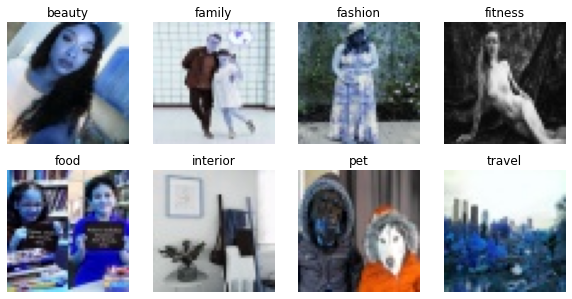

In [51]:
fig = plt.figure(figsize=(10, 5))

rows = 2
columns = 4

image_count = 1

for category in random_filenames_dict:
    loaded_image = load_image(resized_test_image_folders_base + category + '/', random_filenames_dict[category])
    fig.add_subplot(rows, columns, image_count)
    plt.imshow(loaded_image)
    plt.axis('off')
    plt.title(category)
    image_count = image_count + 1

In [52]:
for category in random_filenames_dict:
    test_image = load_image(resized_test_image_folders_base + category + '/', random_filenames_dict[category])
    test_image = np.expand_dims(test_image, axis=0)
    prediction = model.predict(test_image)
    print(f'{category}: {prediction}\n')

beauty: [[0.17215165 0.24522798 0.29278517 0.1015512  0.03343476 0.01033197
  0.12353282 0.02098442]]

family: [[0.10504828 0.20994972 0.1915462  0.09620137 0.04931676 0.03642706
  0.2398742  0.07163642]]

fashion: [[0.0677268  0.1060982  0.07769426 0.07823383 0.17897706 0.16266954
  0.13967642 0.18892393]]

fitness: [[0.09262929 0.1174819  0.09287889 0.07710284 0.17606278 0.13592303
  0.14880762 0.15911363]]

food: [[0.10069205 0.21876985 0.20281497 0.17995661 0.07747954 0.03352069
  0.12226561 0.06450068]]

interior: [[0.07548621 0.14059682 0.10832882 0.0936116  0.1235928  0.11223259
  0.17720075 0.16895047]]

pet: [[0.06284969 0.12128595 0.08690558 0.0878396  0.14794157 0.1358897
  0.16303252 0.19425546]]

travel: [[0.05552001 0.09086117 0.06770289 0.06484129 0.16721493 0.194835
  0.14144349 0.21758117]]



# Individual Models

## Image Preparation

In [53]:
resized_images_individual_models_base = '/Users/mshayganfar/Documents/Mahni/Influencers/resized_images_individual_models/'

In [54]:
sampled_filenames_dict = {'beauty':[], 'family':[], 'fashion':[], 'fitness':[], 
                          'food':[], 'interior':[], 'pet':[], 'travel':[]}

In [55]:
# Reading image file names.

for category in list(sampled_filenames_dict.keys()):
    # check if file exist in destination
    specific_folder = resized_images_individual_models_base + category.capitalize() + '/' + category + '/'
    filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.endswith('.jpg')]
    sampled_filenames_dict[category] = filenames

    print(f"Category {category} is done.")

Category beauty is done.
Category family is done.
Category fashion is done.
Category fitness is done.
Category food is done.
Category interior is done.
Category pet is done.
Category travel is done.


In [ ]:
# Copying the resized files into the destination folders.

for category in sampled_filenames_dict:
    number_of_files = len(sampled_filenames_dict[category])
    number_of_files_per_category = number_of_files//7
    for other_category in list(sampled_filenames_dict.keys()):
        if other_category != category:
            number_of_files_in_other_category = len(sampled_filenames_dict[other_category])
            for i in range(0, number_of_files_per_category):
                file_index = random.randint(0, number_of_files_in_other_category-1)
                filename = sampled_filenames_dict[other_category][file_index]
                src_folder = resized_images_individual_models_base + other_category.capitalize() + '/' + other_category + '/'
                dst_folder = resized_images_individual_models_base + category.capitalize() + '/not_' + category + '/'
                if os.path.exists(src_folder + filename):
                    shutil.copy(src_folder + filename, dst_folder + filename)
                else:
                    print(f"File {filename} doesn't exist in this {src_folder}!")
    print(f"Category {category} is done.")

### Beauty

In [68]:
beauty_image_folder = resized_images_individual_models_base + 'Beauty/'

In [69]:
beauty_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    beauty_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['beauty', 'not_beauty'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="training"
)

Found 224 files belonging to 2 classes.
Using 202 files for training.


In [70]:
beauty_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    beauty_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['beauty', 'not_beauty'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="validation"
)

Found 224 files belonging to 2 classes.
Using 22 files for validation.


In [71]:
beauty_model = Sequential()

# CONVOLUTIONAL LAYER
beauty_model.add(Conv2D(filters=32,
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                        kernel_size=(3,3), 
                        input_shape=(50, 50, 3), 
                        activation='relu'))

# POOLING LAYER
beauty_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
beauty_model.add(Conv2D(filters=64,
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                        kernel_size=(3,3), 
                        activation='relu'))

# POOLING LAYER & DROPOUT
beauty_model.add(MaxPool2D(pool_size=(2, 2)))
beauty_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
beauty_model.add(Conv2D(filters=64, 
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                        kernel_size=(3,3), 
                        activation='relu'))

# POOLING LAYER & DROPOUT
beauty_model.add(MaxPool2D(pool_size=(2, 2)))
beauty_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
beauty_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
beauty_model.add(Dense(128, 
                       kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                       activation='relu'))
beauty_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
beauty_model.add(Dense(64, 
                       kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                       activation='relu'))
beauty_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 8 POSSIBLE CLASSES
beauty_model.add(Dense(1, activation='sigmoid'))

In [72]:
beauty_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 11, 11, 64)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 9, 9, 64)         

In [73]:
beauty_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy']) #binary_accuracy?

In [74]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [75]:
beauty_history = beauty_model.fit(beauty_train_images,
                                  validation_data=beauty_validation_images,
                                  epochs=300,
                                  callbacks=[early_stop])

Epoch 1/300
7/7 [==============================] - 1s 64ms/step - loss: 46.6976 - accuracy: 0.5050 - val_loss: 10.0122 - val_accuracy: 0.5909
Epoch 2/300
7/7 [==============================] - 0s 48ms/step - loss: 22.2008 - accuracy: 0.4901 - val_loss: 8.6309 - val_accuracy: 0.4545
Epoch 3/300
7/7 [==============================] - 0s 48ms/step - loss: 14.4822 - accuracy: 0.4554 - val_loss: 8.5618 - val_accuracy: 0.5000
Epoch 4/300
7/7 [==============================] - 0s 48ms/step - loss: 10.5956 - accuracy: 0.5050 - val_loss: 8.4633 - val_accuracy: 0.5000
Epoch 5/300
7/7 [==============================] - 0s 50ms/step - loss: 9.4186 - accuracy: 0.5099 - val_loss: 8.3928 - val_accuracy: 0.6364
Epoch 6/300
7/7 [==============================] - 0s 47ms/step - loss: 9.0407 - accuracy: 0.4703 - val_loss: 8.3746 - val_accuracy: 0.3636
Epoch 7/300
7/7 [==============================] - 0s 49ms/step - loss: 8.6338 - accuracy: 0.4950 - val_loss: 8.3399 - val_accuracy: 0.4091
Epoch 8/300
7/7

7/7 [==============================] - 0s 48ms/step - loss: 5.5547 - accuracy: 0.7079 - val_loss: 5.6481 - val_accuracy: 0.5909
Epoch 118/300
7/7 [==============================] - 0s 45ms/step - loss: 5.5055 - accuracy: 0.7228 - val_loss: 5.6399 - val_accuracy: 0.6818
Epoch 119/300
7/7 [==============================] - 0s 43ms/step - loss: 5.5685 - accuracy: 0.7030 - val_loss: 5.5273 - val_accuracy: 0.7273
Epoch 120/300
7/7 [==============================] - 0s 47ms/step - loss: 5.4979 - accuracy: 0.7327 - val_loss: 5.5534 - val_accuracy: 0.6818
Epoch 121/300
7/7 [==============================] - 0s 46ms/step - loss: 5.4581 - accuracy: 0.7228 - val_loss: 5.5931 - val_accuracy: 0.6364
Epoch 122/300
7/7 [==============================] - 0s 45ms/step - loss: 5.4319 - accuracy: 0.7178 - val_loss: 5.5005 - val_accuracy: 0.6818
Epoch 123/300
7/7 [==============================] - 0s 45ms/step - loss: 5.3822 - accuracy: 0.7079 - val_loss: 5.4942 - val_accuracy: 0.5909
Epoch 124/300
7/7 [=

Epoch 175/300
7/7 [==============================] - 0s 42ms/step - loss: 4.3390 - accuracy: 0.8020 - val_loss: 4.5465 - val_accuracy: 0.6364
Epoch 176/300
7/7 [==============================] - 0s 41ms/step - loss: 4.3522 - accuracy: 0.8020 - val_loss: 4.4888 - val_accuracy: 0.7273
Epoch 177/300
7/7 [==============================] - 0s 40ms/step - loss: 4.3485 - accuracy: 0.8069 - val_loss: 4.4971 - val_accuracy: 0.6818
Epoch 178/300
7/7 [==============================] - 0s 40ms/step - loss: 4.3078 - accuracy: 0.7822 - val_loss: 4.4048 - val_accuracy: 0.8182
Epoch 179/300
7/7 [==============================] - 0s 42ms/step - loss: 4.2884 - accuracy: 0.7970 - val_loss: 4.3134 - val_accuracy: 0.7727
Epoch 180/300
7/7 [==============================] - 0s 40ms/step - loss: 4.3265 - accuracy: 0.7475 - val_loss: 4.4527 - val_accuracy: 0.7727
Epoch 181/300
7/7 [==============================] - 0s 40ms/step - loss: 4.2603 - accuracy: 0.7822 - val_loss: 4.4718 - val_accuracy: 0.6818
Epoch 

Epoch 233/300
7/7 [==============================] - 0s 42ms/step - loss: 3.2303 - accuracy: 0.8960 - val_loss: 3.3836 - val_accuracy: 0.8182
Epoch 234/300
7/7 [==============================] - 0s 42ms/step - loss: 3.2203 - accuracy: 0.8861 - val_loss: 3.4394 - val_accuracy: 0.7273
Epoch 235/300
7/7 [==============================] - 0s 42ms/step - loss: 3.1979 - accuracy: 0.8911 - val_loss: 3.6960 - val_accuracy: 0.6818
Epoch 236/300
7/7 [==============================] - 0s 43ms/step - loss: 3.2458 - accuracy: 0.8713 - val_loss: 3.4368 - val_accuracy: 0.7273
Epoch 237/300
7/7 [==============================] - 0s 43ms/step - loss: 3.1541 - accuracy: 0.9208 - val_loss: 3.3480 - val_accuracy: 0.7727
Epoch 238/300
7/7 [==============================] - 0s 43ms/step - loss: 3.1569 - accuracy: 0.8911 - val_loss: 3.4593 - val_accuracy: 0.6818
Epoch 239/300
7/7 [==============================] - 0s 42ms/step - loss: 3.0901 - accuracy: 0.9307 - val_loss: 3.5112 - val_accuracy: 0.7273
Epoch 

Epoch 291/300
7/7 [==============================] - 0s 41ms/step - loss: 2.4104 - accuracy: 0.9158 - val_loss: 2.6822 - val_accuracy: 0.7273
Epoch 292/300
7/7 [==============================] - 0s 42ms/step - loss: 2.3302 - accuracy: 0.9554 - val_loss: 2.6912 - val_accuracy: 0.7273
Epoch 293/300
7/7 [==============================] - 0s 40ms/step - loss: 2.3676 - accuracy: 0.9406 - val_loss: 2.9211 - val_accuracy: 0.7273
Epoch 294/300
7/7 [==============================] - 0s 49ms/step - loss: 2.3843 - accuracy: 0.9059 - val_loss: 2.6470 - val_accuracy: 0.6818
Epoch 295/300
7/7 [==============================] - 0s 41ms/step - loss: 2.4112 - accuracy: 0.8812 - val_loss: 2.8649 - val_accuracy: 0.5455
Epoch 296/300
7/7 [==============================] - 0s 41ms/step - loss: 2.3757 - accuracy: 0.9059 - val_loss: 2.7578 - val_accuracy: 0.5455
Epoch 297/300
7/7 [==============================] - 0s 45ms/step - loss: 2.2827 - accuracy: 0.9554 - val_loss: 2.6168 - val_accuracy: 0.7727
Epoch 

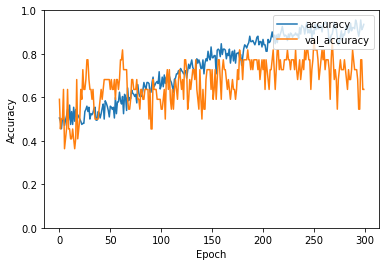

In [76]:
plt.plot(beauty_history.history['accuracy'], label='accuracy')
plt.plot(beauty_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='upper right')

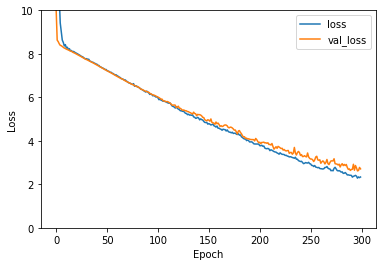

In [78]:
plt.plot(beauty_history.history['loss'], label='loss')
plt.plot(beauty_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 10.0])
plt.legend(loc='upper right')

In [167]:
test_image = load_image(resized_test_image_folders_base + 'beauty/', random_filenames_dict['beauty'])
test_image = np.expand_dims(test_image, axis=0)
prediction = beauty_model.predict(test_image)
print(f'Beauty: {prediction}\n')

Beauty: [[0.00017428]]



### Family

In [87]:
family_image_folder = resized_images_individual_models_base + 'Family/'

In [88]:
family_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    family_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['family', 'not_family'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="training"
)

Found 332 files belonging to 2 classes.
Using 299 files for training.


In [89]:
family_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    family_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['family', 'not_family'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="validation"
)

Found 332 files belonging to 2 classes.
Using 33 files for validation.


In [90]:
family_model = Sequential()

# CONVOLUTIONAL LAYER
family_model.add(Conv2D(filters=32,
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                        kernel_size=(3,3), 
                        input_shape=(50, 50, 3), 
                        activation='relu'))

# POOLING LAYER
family_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
family_model.add(Conv2D(filters=64,
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                        kernel_size=(3,3), 
                        activation='relu'))

# POOLING LAYER & DROPOUT
family_model.add(MaxPool2D(pool_size=(2, 2)))
family_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
family_model.add(Conv2D(filters=64, 
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                        kernel_size=(3,3), 
                        activation='relu'))

# POOLING LAYER & DROPOUT
family_model.add(MaxPool2D(pool_size=(2, 2)))
family_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
family_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
family_model.add(Dense(128, 
                       kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                       activation='relu'))
family_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
family_model.add(Dense(64, 
                       kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                       activation='relu'))
family_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 8 POSSIBLE CLASSES
family_model.add(Dense(1, activation='sigmoid'))

In [91]:
family_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 9, 64)         

In [92]:
family_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [93]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [94]:
family_history = family_model.fit(family_train_images,
                                  validation_data=family_validation_images,
                                  epochs=200,
                                  callbacks=[early_stop])

Epoch 1/200
10/10 [==============================] - 1s 58ms/step - loss: 35.6629 - accuracy: 0.5084 - val_loss: 8.8100 - val_accuracy: 0.2727
Epoch 2/200
10/10 [==============================] - 0s 47ms/step - loss: 13.9764 - accuracy: 0.5084 - val_loss: 8.5204 - val_accuracy: 0.5152
Epoch 3/200
10/10 [==============================] - 0s 45ms/step - loss: 10.0005 - accuracy: 0.5518 - val_loss: 8.4522 - val_accuracy: 0.3939
Epoch 4/200
10/10 [==============================] - 0s 47ms/step - loss: 9.0967 - accuracy: 0.5184 - val_loss: 8.3476 - val_accuracy: 0.4545
Epoch 5/200
10/10 [==============================] - 0s 47ms/step - loss: 8.7800 - accuracy: 0.4916 - val_loss: 8.2951 - val_accuracy: 0.4242
Epoch 6/200
10/10 [==============================] - 0s 46ms/step - loss: 8.4472 - accuracy: 0.4916 - val_loss: 8.2424 - val_accuracy: 0.3939
Epoch 7/200
10/10 [==============================] - 0s 47ms/step - loss: 8.3298 - accuracy: 0.5652 - val_loss: 8.1869 - val_accuracy: 0.4848
Epo

10/10 [==============================] - 0s 47ms/step - loss: 4.0366 - accuracy: 0.5920 - val_loss: 4.0171 - val_accuracy: 0.5455
Epoch 116/200
10/10 [==============================] - 0s 48ms/step - loss: 3.9932 - accuracy: 0.6522 - val_loss: 3.9903 - val_accuracy: 0.5455
Epoch 117/200
10/10 [==============================] - 0s 45ms/step - loss: 3.9768 - accuracy: 0.6087 - val_loss: 3.9603 - val_accuracy: 0.5455
Epoch 118/200
10/10 [==============================] - 0s 44ms/step - loss: 3.9254 - accuracy: 0.6288 - val_loss: 3.9175 - val_accuracy: 0.4848
Epoch 119/200
10/10 [==============================] - 0s 46ms/step - loss: 3.8995 - accuracy: 0.5987 - val_loss: 3.8954 - val_accuracy: 0.5152
Epoch 120/200
10/10 [==============================] - 0s 46ms/step - loss: 3.8896 - accuracy: 0.5819 - val_loss: 3.8829 - val_accuracy: 0.5152
Epoch 121/200
10/10 [==============================] - 0s 44ms/step - loss: 3.8559 - accuracy: 0.6288 - val_loss: 3.8598 - val_accuracy: 0.5152
Epoch 

Epoch 172/200
10/10 [==============================] - 0s 47ms/step - loss: 2.6039 - accuracy: 0.6823 - val_loss: 2.6873 - val_accuracy: 0.5152
Epoch 173/200
10/10 [==============================] - 0s 41ms/step - loss: 2.5549 - accuracy: 0.7023 - val_loss: 2.7256 - val_accuracy: 0.4242
Epoch 174/200
10/10 [==============================] - 0s 42ms/step - loss: 2.5284 - accuracy: 0.7191 - val_loss: 2.6592 - val_accuracy: 0.5152
Epoch 175/200
10/10 [==============================] - 0s 40ms/step - loss: 2.5369 - accuracy: 0.7023 - val_loss: 2.6742 - val_accuracy: 0.4848
Epoch 176/200
10/10 [==============================] - 0s 43ms/step - loss: 2.4944 - accuracy: 0.7124 - val_loss: 2.6594 - val_accuracy: 0.4545
Epoch 177/200
10/10 [==============================] - 0s 39ms/step - loss: 2.5078 - accuracy: 0.7090 - val_loss: 2.6505 - val_accuracy: 0.4242
Epoch 178/200
10/10 [==============================] - 0s 41ms/step - loss: 2.4909 - accuracy: 0.7291 - val_loss: 2.6541 - val_accuracy:

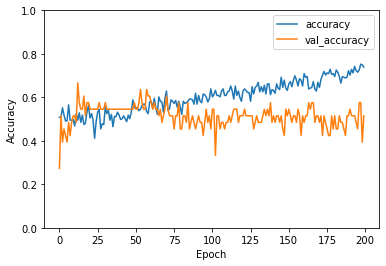

In [95]:
plt.plot(family_history.history['accuracy'], label='accuracy')
plt.plot(family_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='upper right')

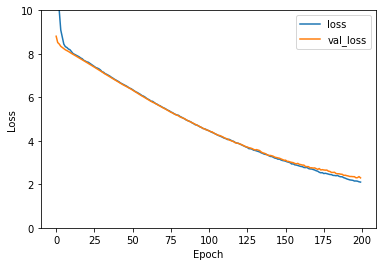

In [97]:
plt.plot(family_history.history['loss'], label='loss')
plt.plot(family_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 10.0])
plt.legend(loc='upper right')

In [170]:
test_image = load_image(resized_test_image_folders_base + 'family/', random_filenames_dict['family'])
test_image = np.expand_dims(test_image, axis=0)
prediction = family_model.predict(test_image)
print(f'Family: {prediction}\n')

Family: [[0.6111866]]



### Fashion

In [98]:
fashion_image_folder = resized_images_individual_models_base + 'Fashion/'

In [99]:
fashion_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    fashion_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['fashion', 'not_fashion'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="training"
)

Found 263 files belonging to 2 classes.
Using 237 files for training.


In [100]:
fashion_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    fashion_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['fashion', 'not_fashion'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="validation"
)

Found 263 files belonging to 2 classes.
Using 26 files for validation.


In [101]:
fashion_model = Sequential()

# CONVOLUTIONAL LAYER
fashion_model.add(Conv2D(filters=32,
                         kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                         kernel_size=(3,3), 
                         input_shape=(50, 50, 3), 
                         activation='relu'))

# POOLING LAYER
fashion_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
fashion_model.add(Conv2D(filters=64,
                         kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                         kernel_size=(3,3), 
                         activation='relu'))

# POOLING LAYER & DROPOUT
fashion_model.add(MaxPool2D(pool_size=(2, 2)))
fashion_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
fashion_model.add(Conv2D(filters=64, 
                         kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                         kernel_size=(3,3), 
                         activation='relu'))

# POOLING LAYER & DROPOUT
fashion_model.add(MaxPool2D(pool_size=(2, 2)))
fashion_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
fashion_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
fashion_model.add(Dense(128, 
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                        activation='relu'))
fashion_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
fashion_model.add(Dense(64, 
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                        activation='relu'))
fashion_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 8 POSSIBLE CLASSES
fashion_model.add(Dense(1, activation='sigmoid'))

In [102]:
fashion_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 9, 9, 64)         

In [103]:
fashion_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [104]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [105]:
fashion_history = fashion_model.fit(fashion_train_images,
                                    validation_data=fashion_validation_images,
                                    epochs=200,
                                    callbacks=[early_stop])

Epoch 1/200
8/8 [==============================] - 1s 64ms/step - loss: 27.3619 - accuracy: 0.5148 - val_loss: 8.5145 - val_accuracy: 0.6923
Epoch 2/200
8/8 [==============================] - 0s 48ms/step - loss: 12.6293 - accuracy: 0.5654 - val_loss: 8.6717 - val_accuracy: 0.5385
Epoch 3/200
8/8 [==============================] - 0s 52ms/step - loss: 9.9708 - accuracy: 0.5063 - val_loss: 8.4448 - val_accuracy: 0.5769
Epoch 4/200
8/8 [==============================] - 0s 57ms/step - loss: 8.9698 - accuracy: 0.5021 - val_loss: 8.4032 - val_accuracy: 0.6923
Epoch 5/200
8/8 [==============================] - 0s 59ms/step - loss: 8.5162 - accuracy: 0.5232 - val_loss: 8.3590 - val_accuracy: 0.5769
Epoch 6/200
8/8 [==============================] - 0s 52ms/step - loss: 8.4582 - accuracy: 0.5105 - val_loss: 8.3212 - val_accuracy: 0.6538
Epoch 7/200
8/8 [==============================] - 0s 61ms/step - loss: 8.3950 - accuracy: 0.5021 - val_loss: 8.2757 - val_accuracy: 0.6538
Epoch 8/200
8/8 [=

8/8 [==============================] - 0s 42ms/step - loss: 4.0490 - accuracy: 0.6793 - val_loss: 4.1031 - val_accuracy: 0.6538
Epoch 118/200
8/8 [==============================] - 0s 44ms/step - loss: 4.0331 - accuracy: 0.6245 - val_loss: 4.0695 - val_accuracy: 0.6923
Epoch 119/200
8/8 [==============================] - 0s 43ms/step - loss: 3.9962 - accuracy: 0.6414 - val_loss: 4.0434 - val_accuracy: 0.6923
Epoch 120/200
8/8 [==============================] - 0s 41ms/step - loss: 3.9822 - accuracy: 0.6456 - val_loss: 4.0180 - val_accuracy: 0.6923
Epoch 121/200
8/8 [==============================] - 0s 42ms/step - loss: 3.9499 - accuracy: 0.6371 - val_loss: 3.9905 - val_accuracy: 0.6154
Epoch 122/200
8/8 [==============================] - 0s 44ms/step - loss: 3.9133 - accuracy: 0.6751 - val_loss: 3.9654 - val_accuracy: 0.6923
Epoch 123/200
8/8 [==============================] - 0s 42ms/step - loss: 3.8784 - accuracy: 0.6667 - val_loss: 3.9327 - val_accuracy: 0.6923
Epoch 124/200
8/8 [=

Epoch 175/200
8/8 [==============================] - 0s 57ms/step - loss: 2.6704 - accuracy: 0.7004 - val_loss: 2.7470 - val_accuracy: 0.6538
Epoch 176/200
8/8 [==============================] - 0s 53ms/step - loss: 2.6405 - accuracy: 0.7046 - val_loss: 2.7285 - val_accuracy: 0.7692
Epoch 177/200
8/8 [==============================] - 0s 60ms/step - loss: 2.6239 - accuracy: 0.6751 - val_loss: 2.6896 - val_accuracy: 0.7692
Epoch 178/200
8/8 [==============================] - 0s 59ms/step - loss: 2.6041 - accuracy: 0.6962 - val_loss: 2.7401 - val_accuracy: 0.7308
Epoch 179/200
8/8 [==============================] - 0s 47ms/step - loss: 2.5800 - accuracy: 0.6962 - val_loss: 2.7372 - val_accuracy: 0.7308
Epoch 180/200
8/8 [==============================] - 0s 44ms/step - loss: 2.5442 - accuracy: 0.7173 - val_loss: 2.7054 - val_accuracy: 0.7308
Epoch 181/200
8/8 [==============================] - 0s 45ms/step - loss: 2.5357 - accuracy: 0.7342 - val_loss: 2.6968 - val_accuracy: 0.6923
Epoch 

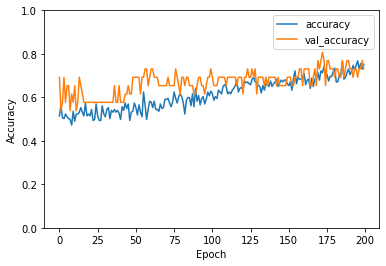

In [106]:
plt.plot(fashion_history.history['accuracy'], label='accuracy')
plt.plot(fashion_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='upper right')

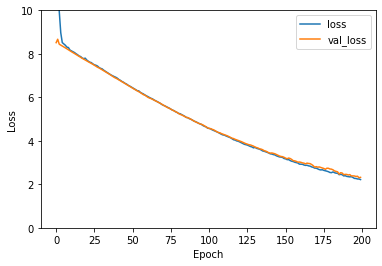

In [107]:
plt.plot(fashion_history.history['loss'], label='loss')
plt.plot(fashion_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 10.0])
plt.legend(loc='upper right')

In [171]:
test_image = load_image(resized_test_image_folders_base + 'fashion/', random_filenames_dict['fashion'])
test_image = np.expand_dims(test_image, axis=0)
prediction = fashion_model.predict(test_image)
print(f'Fashion: {prediction}\n')

Fashion: [[0.65192604]]



### Fitness

In [108]:
fitness_image_folder = resized_images_individual_models_base + 'Fitness/'

In [114]:
fitness_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    fitness_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['fitness', 'not_fitness'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="training"
)

Found 211 files belonging to 2 classes.
Using 190 files for training.


In [115]:
fitness_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    fitness_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['fitness', 'not_fitness'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="validation"
)

Found 211 files belonging to 2 classes.
Using 21 files for validation.


In [109]:
fitness_model = Sequential()

# CONVOLUTIONAL LAYER
fitness_model.add(Conv2D(filters=32,
                         kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                         kernel_size=(3,3), 
                         input_shape=(50, 50, 3), 
                         activation='relu'))

# POOLING LAYER
fitness_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
fitness_model.add(Conv2D(filters=64,
                         kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                         kernel_size=(3,3), 
                         activation='relu'))

# POOLING LAYER & DROPOUT
fitness_model.add(MaxPool2D(pool_size=(2, 2)))
fitness_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
fitness_model.add(Conv2D(filters=64, 
                         kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                         kernel_size=(3,3), 
                         activation='relu'))

# POOLING LAYER & DROPOUT
fitness_model.add(MaxPool2D(pool_size=(2, 2)))
fitness_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
fitness_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
fitness_model.add(Dense(128, 
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                        activation='relu'))
fitness_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
fitness_model.add(Dense(64, 
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                        activation='relu'))
fitness_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 8 POSSIBLE CLASSES
fitness_model.add(Dense(1, activation='sigmoid'))

In [110]:
fitness_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 9, 9, 64)         

In [116]:
fitness_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

In [117]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [118]:
fitness_history = fitness_model.fit(fitness_train_images,
                                    validation_data=fitness_validation_images,
                                    epochs=200,
                                    callbacks=[early_stop])

Epoch 1/200
6/6 [==============================] - 1s 72ms/step - loss: 32.1016 - accuracy: 0.5263 - val_loss: 9.1750 - val_accuracy: 0.4762
Epoch 2/200
6/6 [==============================] - 0s 61ms/step - loss: 16.4656 - accuracy: 0.5316 - val_loss: 8.3929 - val_accuracy: 0.5714
Epoch 3/200
6/6 [==============================] - 0s 78ms/step - loss: 11.6566 - accuracy: 0.5105 - val_loss: 8.4524 - val_accuracy: 0.4762
Epoch 4/200
6/6 [==============================] - 0s 72ms/step - loss: 9.4371 - accuracy: 0.5684 - val_loss: 8.3621 - val_accuracy: 0.5238
Epoch 5/200
6/6 [==============================] - 0s 81ms/step - loss: 9.0446 - accuracy: 0.4789 - val_loss: 8.2991 - val_accuracy: 0.4762
Epoch 6/200
6/6 [==============================] - 0s 74ms/step - loss: 8.4962 - accuracy: 0.4947 - val_loss: 8.2422 - val_accuracy: 0.5714
Epoch 7/200
6/6 [==============================] - 0s 57ms/step - loss: 8.3434 - accuracy: 0.5211 - val_loss: 8.1907 - val_accuracy: 0.5238
Epoch 8/200
6/6 [

6/6 [==============================] - 0s 55ms/step - loss: 4.7595 - accuracy: 0.6632 - val_loss: 4.8240 - val_accuracy: 0.5714
Epoch 118/200
6/6 [==============================] - 0s 49ms/step - loss: 4.7570 - accuracy: 0.6421 - val_loss: 4.7868 - val_accuracy: 0.6190
Epoch 119/200
6/6 [==============================] - 0s 50ms/step - loss: 4.6892 - accuracy: 0.6789 - val_loss: 4.7836 - val_accuracy: 0.5238
Epoch 120/200
6/6 [==============================] - 0s 51ms/step - loss: 4.7049 - accuracy: 0.6053 - val_loss: 4.7626 - val_accuracy: 0.5238
Epoch 121/200
6/6 [==============================] - 0s 54ms/step - loss: 4.6664 - accuracy: 0.6947 - val_loss: 4.7118 - val_accuracy: 0.6667
Epoch 122/200
6/6 [==============================] - 0s 52ms/step - loss: 4.6191 - accuracy: 0.6684 - val_loss: 4.6953 - val_accuracy: 0.6667
Epoch 123/200
6/6 [==============================] - 0s 52ms/step - loss: 4.5940 - accuracy: 0.7263 - val_loss: 4.6685 - val_accuracy: 0.6667
Epoch 124/200
6/6 [=

Epoch 175/200
6/6 [==============================] - 0s 56ms/step - loss: 3.4574 - accuracy: 0.7158 - val_loss: 3.6236 - val_accuracy: 0.4762
Epoch 176/200
6/6 [==============================] - 0s 55ms/step - loss: 3.4679 - accuracy: 0.6947 - val_loss: 3.6015 - val_accuracy: 0.4762
Epoch 177/200
6/6 [==============================] - 0s 55ms/step - loss: 3.4366 - accuracy: 0.6789 - val_loss: 3.5675 - val_accuracy: 0.5238
Epoch 178/200
6/6 [==============================] - 0s 63ms/step - loss: 3.4017 - accuracy: 0.7105 - val_loss: 3.5465 - val_accuracy: 0.6190
Epoch 179/200
6/6 [==============================] - 0s 56ms/step - loss: 3.4161 - accuracy: 0.6579 - val_loss: 3.5282 - val_accuracy: 0.6190
Epoch 180/200
6/6 [==============================] - 0s 63ms/step - loss: 3.3828 - accuracy: 0.6789 - val_loss: 3.5200 - val_accuracy: 0.6190
Epoch 181/200
6/6 [==============================] - 0s 59ms/step - loss: 3.3712 - accuracy: 0.6789 - val_loss: 3.5077 - val_accuracy: 0.5714
Epoch 

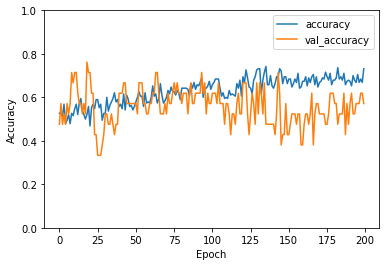

In [121]:
plt.plot(fitness_history.history['accuracy'], label='accuracy')
plt.plot(fitness_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='upper right')

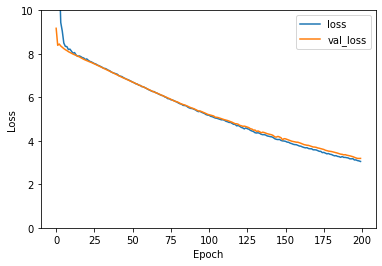

In [122]:
plt.plot(fitness_history.history['loss'], label='loss')
plt.plot(fitness_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 10.0])
plt.legend(loc='upper right')

In [173]:
test_image = load_image(resized_test_image_folders_base + 'fitness/', random_filenames_dict['fitness'])
test_image = np.expand_dims(test_image, axis=0)
prediction = fitness_model.predict(test_image)
print(f'Fitness: {prediction}\n')

Fitness: [[0.57118475]]



### Food

In [123]:
food_image_folder = resized_images_individual_models_base + 'Food/'

In [124]:
food_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    food_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['food', 'not_food'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="training"
)

Found 227 files belonging to 2 classes.
Using 205 files for training.


In [125]:
food_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    food_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['food', 'not_food'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="validation"
)

Found 227 files belonging to 2 classes.
Using 22 files for validation.


In [126]:
food_model = Sequential()

# CONVOLUTIONAL LAYER
food_model.add(Conv2D(filters=32,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3,3), 
                      input_shape=(50, 50, 3), 
                      activation='relu'))

# POOLING LAYER
food_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
food_model.add(Conv2D(filters=64,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3,3), 
                      activation='relu'))

# POOLING LAYER & DROPOUT
food_model.add(MaxPool2D(pool_size=(2, 2)))
food_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
food_model.add(Conv2D(filters=64, 
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3,3), 
                      activation='relu'))

# POOLING LAYER & DROPOUT
food_model.add(MaxPool2D(pool_size=(2, 2)))
food_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
food_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
food_model.add(Dense(128, 
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                     activation='relu'))
food_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
food_model.add(Dense(64, 
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                        activation='relu'))
food_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 8 POSSIBLE CLASSES
food_model.add(Dense(1, activation='sigmoid'))

In [127]:
food_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 9, 9, 64)         

In [128]:
food_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [129]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [130]:
food_history = food_model.fit(food_train_images,
                              validation_data=food_validation_images,
                              epochs=200,
                              callbacks=[early_stop])

Epoch 1/200
7/7 [==============================] - 1s 65ms/step - loss: 35.4634 - accuracy: 0.5122 - val_loss: 9.8709 - val_accuracy: 0.4545
Epoch 2/200
7/7 [==============================] - 0s 51ms/step - loss: 16.1876 - accuracy: 0.4976 - val_loss: 8.4885 - val_accuracy: 0.5455
Epoch 3/200
7/7 [==============================] - 0s 51ms/step - loss: 11.8663 - accuracy: 0.5073 - val_loss: 8.3020 - val_accuracy: 0.5909
Epoch 4/200
7/7 [==============================] - 0s 51ms/step - loss: 9.3295 - accuracy: 0.4683 - val_loss: 8.2486 - val_accuracy: 0.5000
Epoch 5/200
7/7 [==============================] - 0s 50ms/step - loss: 8.6203 - accuracy: 0.4976 - val_loss: 8.1843 - val_accuracy: 0.4545
Epoch 6/200
7/7 [==============================] - 0s 53ms/step - loss: 8.3772 - accuracy: 0.4634 - val_loss: 8.1345 - val_accuracy: 0.5000
Epoch 7/200
7/7 [==============================] - 0s 52ms/step - loss: 8.0946 - accuracy: 0.5463 - val_loss: 8.0845 - val_accuracy: 0.5000
Epoch 8/200
7/7 [

7/7 [==============================] - 0s 42ms/step - loss: 4.7131 - accuracy: 0.7561 - val_loss: 5.2377 - val_accuracy: 0.4545
Epoch 118/200
7/7 [==============================] - 0s 41ms/step - loss: 4.6841 - accuracy: 0.7610 - val_loss: 5.2992 - val_accuracy: 0.4545
Epoch 119/200
7/7 [==============================] - 0s 42ms/step - loss: 4.6820 - accuracy: 0.6976 - val_loss: 5.2300 - val_accuracy: 0.5455
Epoch 120/200
7/7 [==============================] - 0s 44ms/step - loss: 4.6298 - accuracy: 0.7756 - val_loss: 5.1074 - val_accuracy: 0.4545
Epoch 121/200
7/7 [==============================] - 0s 43ms/step - loss: 4.6170 - accuracy: 0.7512 - val_loss: 5.0710 - val_accuracy: 0.5455
Epoch 122/200
7/7 [==============================] - 0s 41ms/step - loss: 4.6162 - accuracy: 0.7366 - val_loss: 5.0368 - val_accuracy: 0.5000
Epoch 123/200
7/7 [==============================] - 0s 40ms/step - loss: 4.5671 - accuracy: 0.7366 - val_loss: 5.0592 - val_accuracy: 0.4545
Epoch 124/200
7/7 [=

Epoch 175/200
7/7 [==============================] - 0s 44ms/step - loss: 3.4287 - accuracy: 0.8000 - val_loss: 4.2873 - val_accuracy: 0.5455
Epoch 176/200
7/7 [==============================] - 0s 44ms/step - loss: 3.4431 - accuracy: 0.7659 - val_loss: 4.2276 - val_accuracy: 0.5000
Epoch 177/200
7/7 [==============================] - 0s 43ms/step - loss: 3.4005 - accuracy: 0.8098 - val_loss: 4.2443 - val_accuracy: 0.5000
Epoch 178/200
7/7 [==============================] - 0s 46ms/step - loss: 3.3512 - accuracy: 0.8341 - val_loss: 4.3846 - val_accuracy: 0.5000
Epoch 179/200
7/7 [==============================] - 0s 41ms/step - loss: 3.3505 - accuracy: 0.8049 - val_loss: 4.3465 - val_accuracy: 0.5000
Epoch 180/200
7/7 [==============================] - 0s 44ms/step - loss: 3.3147 - accuracy: 0.8341 - val_loss: 4.1726 - val_accuracy: 0.6818
Epoch 181/200
7/7 [==============================] - 0s 44ms/step - loss: 3.2943 - accuracy: 0.8244 - val_loss: 4.2699 - val_accuracy: 0.5000


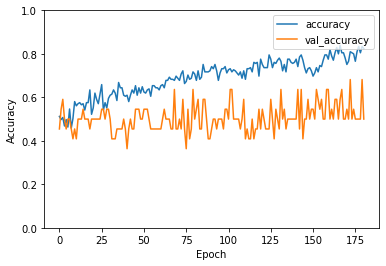

In [131]:
plt.plot(food_history.history['accuracy'], label='accuracy')
plt.plot(food_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='upper right')

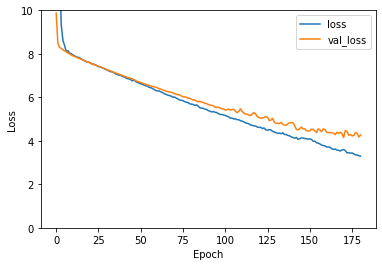

In [132]:
plt.plot(food_history.history['loss'], label='loss')
plt.plot(food_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 10.0])
plt.legend(loc='upper right')

In [175]:
test_image = load_image(resized_test_image_folders_base + 'food/', random_filenames_dict['food'])
test_image = np.expand_dims(test_image, axis=0)
prediction = food_model.predict(test_image)
print(f'Food: {prediction}\n')

Food: [[0.99818563]]



### Interior

In [133]:
interior_image_folder = resized_images_individual_models_base + 'Interior/'

In [134]:
interior_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    interior_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['interior', 'not_interior'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="training"
)

Found 206 files belonging to 2 classes.
Using 186 files for training.


In [135]:
interior_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    interior_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['interior', 'not_interior'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="validation"
)

Found 206 files belonging to 2 classes.
Using 20 files for validation.


In [136]:
interior_model = Sequential()

# CONVOLUTIONAL LAYER
interior_model.add(Conv2D(filters=32,
                          kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                          kernel_size=(3,3), 
                          input_shape=(50, 50, 3), 
                          activation='relu'))

# POOLING LAYER
interior_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
interior_model.add(Conv2D(filters=64,
                          kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                          kernel_size=(3,3), 
                          activation='relu'))

# POOLING LAYER & DROPOUT
interior_model.add(MaxPool2D(pool_size=(2, 2)))
interior_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
interior_model.add(Conv2D(filters=64, 
                          kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                          kernel_size=(3,3), 
                          activation='relu'))

# POOLING LAYER & DROPOUT
interior_model.add(MaxPool2D(pool_size=(2, 2)))
interior_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
interior_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
interior_model.add(Dense(128, 
                         kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                         activation='relu'))
interior_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
interior_model.add(Dense(64, 
                         kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                         activation='relu'))
interior_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 8 POSSIBLE CLASSES
interior_model.add(Dense(1, activation='sigmoid'))

In [137]:
interior_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 9, 9, 64)         

In [138]:
interior_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [139]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [140]:
interior_history = interior_model.fit(interior_train_images,
                                      validation_data=interior_validation_images,
                                      epochs=200,
                                      callbacks=[early_stop])

Epoch 1/200
6/6 [==============================] - 1s 80ms/step - loss: 37.8016 - accuracy: 0.5054 - val_loss: 10.5021 - val_accuracy: 0.4000
Epoch 2/200
6/6 [==============================] - 0s 55ms/step - loss: 13.9997 - accuracy: 0.5215 - val_loss: 8.6921 - val_accuracy: 0.3500
Epoch 3/200
6/6 [==============================] - 0s 54ms/step - loss: 10.5841 - accuracy: 0.4839 - val_loss: 8.4887 - val_accuracy: 0.5000
Epoch 4/200
6/6 [==============================] - 0s 52ms/step - loss: 9.2934 - accuracy: 0.5484 - val_loss: 8.4973 - val_accuracy: 0.4000
Epoch 5/200
6/6 [==============================] - 0s 70ms/step - loss: 9.1172 - accuracy: 0.4946 - val_loss: 8.4425 - val_accuracy: 0.4500
Epoch 6/200
6/6 [==============================] - 0s 70ms/step - loss: 8.7627 - accuracy: 0.5215 - val_loss: 8.3897 - val_accuracy: 0.4500
Epoch 7/200
6/6 [==============================] - 0s 64ms/step - loss: 8.4518 - accuracy: 0.4516 - val_loss: 8.3391 - val_accuracy: 0.4500
Epoch 8/200
6/6 

6/6 [==============================] - 0s 51ms/step - loss: 4.7277 - accuracy: 0.8065 - val_loss: 5.1618 - val_accuracy: 0.5000
Epoch 118/200
6/6 [==============================] - 0s 54ms/step - loss: 4.6436 - accuracy: 0.8548 - val_loss: 5.1706 - val_accuracy: 0.5500
Epoch 119/200
6/6 [==============================] - 0s 49ms/step - loss: 4.5613 - accuracy: 0.8495 - val_loss: 5.1719 - val_accuracy: 0.5500
Epoch 120/200
6/6 [==============================] - 0s 48ms/step - loss: 4.5161 - accuracy: 0.9032 - val_loss: 5.0079 - val_accuracy: 0.6500
Epoch 121/200
6/6 [==============================] - 0s 68ms/step - loss: 4.5306 - accuracy: 0.8710 - val_loss: 5.0883 - val_accuracy: 0.5500
Epoch 122/200
6/6 [==============================] - 0s 62ms/step - loss: 4.4902 - accuracy: 0.8925 - val_loss: 5.0562 - val_accuracy: 0.5000
Epoch 123/200
6/6 [==============================] - 0s 60ms/step - loss: 4.5007 - accuracy: 0.8441 - val_loss: 4.9644 - val_accuracy: 0.5000
Epoch 124/200
6/6 [=

Epoch 175/200
6/6 [==============================] - 0s 45ms/step - loss: 3.1755 - accuracy: 0.9462 - val_loss: 4.0950 - val_accuracy: 0.6000
Epoch 176/200
6/6 [==============================] - 0s 45ms/step - loss: 3.1593 - accuracy: 0.9570 - val_loss: 4.0546 - val_accuracy: 0.6500
Epoch 177/200
6/6 [==============================] - 0s 48ms/step - loss: 3.1361 - accuracy: 0.9355 - val_loss: 4.0590 - val_accuracy: 0.6000
Epoch 178/200
6/6 [==============================] - 0s 47ms/step - loss: 3.0872 - accuracy: 0.9570 - val_loss: 4.0359 - val_accuracy: 0.6000
Epoch 179/200
6/6 [==============================] - 0s 44ms/step - loss: 3.0480 - accuracy: 0.9624 - val_loss: 4.0620 - val_accuracy: 0.6000
Epoch 180/200
6/6 [==============================] - 0s 47ms/step - loss: 3.0768 - accuracy: 0.9355 - val_loss: 4.0509 - val_accuracy: 0.6000
Epoch 181/200
6/6 [==============================] - 0s 46ms/step - loss: 3.0804 - accuracy: 0.9301 - val_loss: 3.9589 - val_accuracy: 0.6500
Epoch 

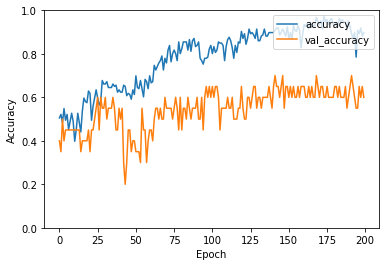

In [141]:
plt.plot(interior_history.history['accuracy'], label='accuracy')
plt.plot(interior_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='upper right')

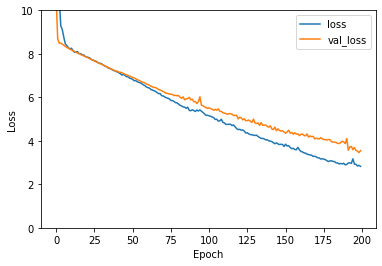

In [153]:
plt.plot(interior_history.history['loss'], label='loss')
plt.plot(interior_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 10.0])
plt.legend(loc='upper right')

In [176]:
test_image = load_image(resized_test_image_folders_base + 'interior/', random_filenames_dict['interior'])
test_image = np.expand_dims(test_image, axis=0)
prediction = interior_model.predict(test_image)
print(f'Interior: {prediction}\n')

Interior: [[0.09188455]]



### Pet

In [143]:
pet_image_folder = resized_images_individual_models_base + 'Pet/'

In [144]:
pet_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    pet_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['pet', 'not_pet'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="training"
)

Found 311 files belonging to 2 classes.
Using 280 files for training.


In [145]:
pet_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    pet_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['pet', 'not_pet'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="validation"
)

Found 311 files belonging to 2 classes.
Using 31 files for validation.


In [146]:
pet_model = Sequential()

# CONVOLUTIONAL LAYER
pet_model.add(Conv2D(filters=32,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     kernel_size=(3,3), 
                     input_shape=(50, 50, 3), 
                     activation='relu'))

# POOLING LAYER
pet_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
pet_model.add(Conv2D(filters=64,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     kernel_size=(3,3), 
                     activation='relu'))

# POOLING LAYER & DROPOUT
pet_model.add(MaxPool2D(pool_size=(2, 2)))
pet_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
pet_model.add(Conv2D(filters=64, 
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     kernel_size=(3,3), 
                     activation='relu'))

# POOLING LAYER & DROPOUT
pet_model.add(MaxPool2D(pool_size=(2, 2)))
pet_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
pet_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
pet_model.add(Dense(128, 
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                    activation='relu'))
pet_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
pet_model.add(Dense(64, 
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                    activation='relu'))
pet_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 8 POSSIBLE CLASSES
pet_model.add(Dense(1, activation='sigmoid'))

In [147]:
pet_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 dropout_36 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 9, 9, 64)         

In [148]:
pet_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [149]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [150]:
pet_history = pet_model.fit(pet_train_images,
                            validation_data=pet_validation_images,
                            epochs=200,
                            callbacks=[early_stop])

Epoch 1/200
9/9 [==============================] - 1s 65ms/step - loss: 55.6988 - accuracy: 0.4821 - val_loss: 10.1034 - val_accuracy: 0.4194
Epoch 2/200
9/9 [==============================] - 0s 50ms/step - loss: 22.6703 - accuracy: 0.4929 - val_loss: 8.5651 - val_accuracy: 0.6452
Epoch 3/200
9/9 [==============================] - 0s 50ms/step - loss: 11.8386 - accuracy: 0.4964 - val_loss: 8.4085 - val_accuracy: 0.5484
Epoch 4/200
9/9 [==============================] - 0s 50ms/step - loss: 9.0587 - accuracy: 0.5214 - val_loss: 8.3527 - val_accuracy: 0.5806
Epoch 5/200
9/9 [==============================] - 0s 51ms/step - loss: 8.5798 - accuracy: 0.5000 - val_loss: 8.3045 - val_accuracy: 0.7097
Epoch 6/200
9/9 [==============================] - 0s 50ms/step - loss: 8.4294 - accuracy: 0.5000 - val_loss: 8.2782 - val_accuracy: 0.6129
Epoch 7/200
9/9 [==============================] - 0s 52ms/step - loss: 8.3558 - accuracy: 0.4429 - val_loss: 8.2410 - val_accuracy: 0.6452
Epoch 8/200
9/9 

9/9 [==============================] - 1s 59ms/step - loss: 5.2256 - accuracy: 0.5964 - val_loss: 5.2108 - val_accuracy: 0.6452
Epoch 118/200
9/9 [==============================] - 0s 50ms/step - loss: 5.2083 - accuracy: 0.5857 - val_loss: 5.1911 - val_accuracy: 0.6129
Epoch 119/200
9/9 [==============================] - 0s 53ms/step - loss: 5.1720 - accuracy: 0.6143 - val_loss: 5.1715 - val_accuracy: 0.6129
Epoch 120/200
9/9 [==============================] - 1s 55ms/step - loss: 5.1548 - accuracy: 0.5964 - val_loss: 5.1475 - val_accuracy: 0.6129
Epoch 121/200
9/9 [==============================] - 0s 45ms/step - loss: 5.1211 - accuracy: 0.6179 - val_loss: 5.1275 - val_accuracy: 0.5484
Epoch 122/200
9/9 [==============================] - 0s 51ms/step - loss: 5.1104 - accuracy: 0.5929 - val_loss: 5.1047 - val_accuracy: 0.5484
Epoch 123/200
9/9 [==============================] - 0s 49ms/step - loss: 5.0710 - accuracy: 0.6143 - val_loss: 5.0796 - val_accuracy: 0.5806
Epoch 124/200
9/9 [=

Epoch 175/200
9/9 [==============================] - 0s 42ms/step - loss: 3.9522 - accuracy: 0.6786 - val_loss: 4.0019 - val_accuracy: 0.5806
Epoch 176/200
9/9 [==============================] - 0s 44ms/step - loss: 3.9483 - accuracy: 0.6464 - val_loss: 3.9696 - val_accuracy: 0.5806
Epoch 177/200
9/9 [==============================] - 0s 42ms/step - loss: 3.9107 - accuracy: 0.6893 - val_loss: 3.9665 - val_accuracy: 0.5806
Epoch 178/200
9/9 [==============================] - 0s 44ms/step - loss: 3.9014 - accuracy: 0.6643 - val_loss: 3.9384 - val_accuracy: 0.5806
Epoch 179/200
9/9 [==============================] - 0s 44ms/step - loss: 3.8962 - accuracy: 0.6500 - val_loss: 3.9014 - val_accuracy: 0.6129
Epoch 180/200
9/9 [==============================] - 0s 43ms/step - loss: 3.8942 - accuracy: 0.6393 - val_loss: 3.8688 - val_accuracy: 0.6129
Epoch 181/200
9/9 [==============================] - 0s 43ms/step - loss: 3.8449 - accuracy: 0.6607 - val_loss: 3.8804 - val_accuracy: 0.5806
Epoch 

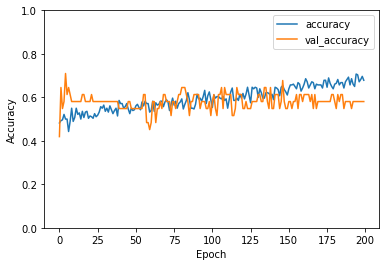

In [151]:
plt.plot(pet_history.history['accuracy'], label='accuracy')
plt.plot(pet_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='upper right')

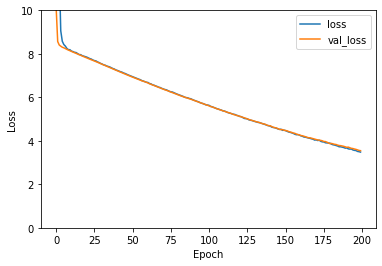

In [152]:
plt.plot(pet_history.history['loss'], label='loss')
plt.plot(pet_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 10.0])
plt.legend(loc='upper right')

In [177]:
test_image = load_image(resized_test_image_folders_base + 'pet/', random_filenames_dict['pet'])
test_image = np.expand_dims(test_image, axis=0)
prediction = pet_model.predict(test_image)
print(f'Pet: {prediction}\n')

Pet: [[0.41536593]]



### Travel

In [155]:
travel_image_folder = resized_images_individual_models_base + 'Travel/'

In [156]:
travel_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    travel_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['travel', 'not_travel'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="training"
)

Found 246 files belonging to 2 classes.
Using 222 files for training.


In [157]:
travel_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    travel_image_folder,
    labels='inferred',
    label_mode='int',
    class_names=['travel', 'not_travel'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.1,
    subset="validation"
)

Found 246 files belonging to 2 classes.
Using 24 files for validation.


In [158]:
travel_model = Sequential()

# CONVOLUTIONAL LAYER
travel_model.add(Conv2D(filters=32,
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                        kernel_size=(3,3), 
                        input_shape=(50, 50, 3), 
                        activation='relu'))

# POOLING LAYER
travel_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
travel_model.add(Conv2D(filters=64,
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                        kernel_size=(3,3), 
                        activation='relu'))

# POOLING LAYER & DROPOUT
travel_model.add(MaxPool2D(pool_size=(2, 2)))
travel_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
travel_model.add(Conv2D(filters=64, 
                        kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                        kernel_size=(3,3), 
                        activation='relu'))

# POOLING LAYER & DROPOUT
travel_model.add(MaxPool2D(pool_size=(2, 2)))
travel_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
travel_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
travel_model.add(Dense(128, 
                       kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                       activation='relu'))
travel_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
travel_model.add(Dense(64, 
                       kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), 
                       activation='relu'))
travel_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER, THUS 8 POSSIBLE CLASSES
travel_model.add(Dense(1, activation='sigmoid'))

In [159]:
travel_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 11, 11, 64)        0         
                                                                 
 conv2d_32 (Conv2D)          (None, 9, 9, 64)        

In [160]:
travel_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [161]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [162]:
travel_history = travel_model.fit(travel_train_images,
                                  validation_data=travel_validation_images,
                                  epochs=200,
                                  callbacks=[early_stop])

Epoch 1/200
7/7 [==============================] - 1s 68ms/step - loss: 39.4231 - accuracy: 0.4910 - val_loss: 8.7247 - val_accuracy: 0.6250
Epoch 2/200
7/7 [==============================] - 0s 55ms/step - loss: 14.0511 - accuracy: 0.5856 - val_loss: 8.8234 - val_accuracy: 0.5000
Epoch 3/200
7/7 [==============================] - 0s 64ms/step - loss: 10.8961 - accuracy: 0.5631 - val_loss: 8.5392 - val_accuracy: 0.4167
Epoch 4/200
7/7 [==============================] - 0s 64ms/step - loss: 10.2642 - accuracy: 0.4595 - val_loss: 8.4097 - val_accuracy: 0.6250
Epoch 5/200
7/7 [==============================] - 0s 63ms/step - loss: 9.2820 - accuracy: 0.4369 - val_loss: 8.3514 - val_accuracy: 0.5417
Epoch 6/200
7/7 [==============================] - 0s 61ms/step - loss: 8.6553 - accuracy: 0.5360 - val_loss: 8.3252 - val_accuracy: 0.4583
Epoch 7/200
7/7 [==============================] - 0s 56ms/step - loss: 8.5284 - accuracy: 0.4640 - val_loss: 8.2844 - val_accuracy: 0.5833
Epoch 8/200
7/7 

7/7 [==============================] - 0s 49ms/step - loss: 4.7698 - accuracy: 0.8288 - val_loss: 4.9055 - val_accuracy: 0.7083
Epoch 118/200
7/7 [==============================] - 0s 47ms/step - loss: 4.7652 - accuracy: 0.8243 - val_loss: 4.9493 - val_accuracy: 0.6667
Epoch 119/200
7/7 [==============================] - 0s 46ms/step - loss: 4.7375 - accuracy: 0.8198 - val_loss: 4.9030 - val_accuracy: 0.6667
Epoch 120/200
7/7 [==============================] - 0s 48ms/step - loss: 4.8592 - accuracy: 0.7387 - val_loss: 4.8728 - val_accuracy: 0.6250
Epoch 121/200
7/7 [==============================] - 0s 46ms/step - loss: 4.8051 - accuracy: 0.7072 - val_loss: 4.8435 - val_accuracy: 0.7083
Epoch 122/200
7/7 [==============================] - 0s 46ms/step - loss: 4.7773 - accuracy: 0.7072 - val_loss: 4.7911 - val_accuracy: 0.6667
Epoch 123/200
7/7 [==============================] - 0s 48ms/step - loss: 4.7905 - accuracy: 0.7072 - val_loss: 4.9605 - val_accuracy: 0.6250
Epoch 124/200
7/7 [=

Epoch 175/200
7/7 [==============================] - 0s 47ms/step - loss: 3.3517 - accuracy: 0.9099 - val_loss: 3.7178 - val_accuracy: 0.6250
Epoch 176/200
7/7 [==============================] - 0s 47ms/step - loss: 3.2777 - accuracy: 0.9324 - val_loss: 3.9109 - val_accuracy: 0.6250
Epoch 177/200
7/7 [==============================] - 0s 46ms/step - loss: 3.3414 - accuracy: 0.8739 - val_loss: 3.7866 - val_accuracy: 0.6250
Epoch 178/200
7/7 [==============================] - 0s 48ms/step - loss: 3.2568 - accuracy: 0.9099 - val_loss: 3.6329 - val_accuracy: 0.6667
Epoch 179/200
7/7 [==============================] - 0s 46ms/step - loss: 3.3013 - accuracy: 0.8694 - val_loss: 3.7937 - val_accuracy: 0.6667
Epoch 180/200
7/7 [==============================] - 0s 45ms/step - loss: 3.3451 - accuracy: 0.8559 - val_loss: 3.4832 - val_accuracy: 0.7917
Epoch 181/200
7/7 [==============================] - 0s 50ms/step - loss: 3.3394 - accuracy: 0.8423 - val_loss: 3.7741 - val_accuracy: 0.6667
Epoch 

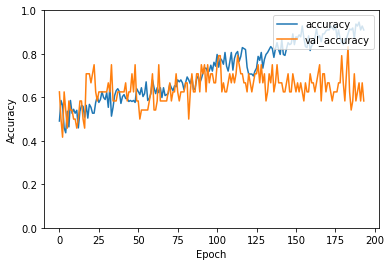

In [163]:
plt.plot(travel_history.history['accuracy'], label='accuracy')
plt.plot(travel_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.0])
plt.legend(loc='upper right')

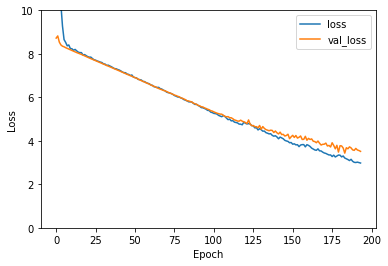

In [164]:
plt.plot(travel_history.history['loss'], label='loss')
plt.plot(travel_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 10.0])
plt.legend(loc='upper right')

In [178]:
test_image = load_image(resized_test_image_folders_base + 'travel/', random_filenames_dict['travel'])
test_image = np.expand_dims(test_image, axis=0)
prediction = travel_model.predict(test_image)
print(f'Travel: {prediction}\n')

Travel: [[0.08167967]]

